In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#creates dataframe and removes rows Unnamed 615-638 (they are empty)
df = pd.read_csv('tfExp.csv',header=0,index_col=0)

In [3]:
tfStartId = ['430', '1052', '1053', '1385', '84699', '9586', '1871', '1874', '144455', '79733', '1960', '1997', '2002', '2004', '80712', '2114', '2115', '2120', '51513', '2551', '2623', '2624', '2625', '9421', '3232', '10320', '3659', '3662', '3670', '91464', '3726', '10661', '11278', '128209', '10365', '9314', '1316', '51176', '9935', '23269', '4602', '4774', '4790', '7025', '9480', '5468', '5914', '5916', '3516', '5971', '864', '6257', '4093', '6659', '6660', '6662', '25803', '347853', '30009', '9496', '6929', '6925', '8463', '7022', '29842', '10155', '6935', '132625', '23051', '85416', '7707', '7764', '23528', '201516']

In [24]:
#lists to store r and p values
pList = []
rList = []
key1List = []
key2List = []
logpList = []
#iterate through all ids.
for key in df.index.values:
    if(str(key) in tfStartId): #filter out unwanted IDs
        row1 = df.loc[key]
        #iterate through all ids for second comparison.
        for key2 in df.index.values:
            if key2 != key and (str(key2) in tfStartId):
                    row2 = df.loc[key2]
                    #person r function
                    p = stats.pearsonr(row1,row2)
                    key1List.append(key)
                    key2List.append(key2)
                    rList.append(p[0])
                    pList.append(p[1]) 

In [25]:
pList[0:5]

[4.2250886111731903e-62,
 3.4503773163325931e-23,
 3.9566525053266772e-13,
 0.012265727334629769,
 6.3654934197853241e-05]

In [17]:
print stats.skew(rList)
print stats.skewtest(rList)

0.568716250742
SkewtestResult(statistic=15.946322403409399, pvalue=3.0217524972431231e-57)


In [37]:
#logarithmic transformation.              
for x in pList:
    logpList.append(-math.log10(x))

In [38]:
#FDR calculating the corrected pList.
size = len(pList)
rankValue = dict(zip(np.argsort(pList),range(len(pList))))
correctPList = range(len(pList))
for i in range(len(pList)):
    print i, pList[i], len(pList), rankValue[i]+1, pList[i]*(float(len(pList))/(rankValue[i]+1))
    correctPList[i] = pList[i]*(float(len(pList))/(rankValue[i]+1))

0 4.22508861117e-62 5402 141 1.61871834593e-60
1 3.45037731633e-23 5402 710 2.62520257223e-22
2 3.95665250533e-13 5402 1375 1.55446086064e-12
3 0.0122657273346 5402 3542 0.0187067925075
4 6.36549341979e-05 5402 2698 0.000127451428664
5 0.000919136178153 5402 3072 0.00161626745911
6 1.75904368126e-06 5402 2307 4.11892239539e-06
7 0.00178720585942 5402 3206 0.0030113805529
8 9.09564864216e-07 5402 2237 2.19645480398e-06
9 3.60197485422e-09 5402 1855 1.04894167992e-08
10 0.00307555292616 5402 3293 0.00504528906988
11 4.26872367946e-12 5402 1506 1.53118494797e-11
12 7.11656624175e-23 5402 724 5.30990204944e-22
13 1.54594668962e-07 5402 2098 3.98055482236e-07
14 0.112278330909 5402 4139 0.146539633625
15 0.699431771465 5402 5105 0.740123492547
16 0.650526767275 5402 5057 0.69490717754
17 0.390611819806 5402 4743 0.444884050304
18 0.00145674026541 5402 3163 0.00248792630849
19 1.30881386134e-13 5402 1326 5.33198527825e-13
20 2.30836287572e-10 5402 1705 7.31365176226e-10
21 0.000347366066338 

314 4.07982687724e-07 5402 2178 1.01190196469e-06
315 2.66696459827e-56 5402 163 8.83861519011e-55
316 0.0137259370527 5402 3571 0.0207637950038
317 1.2131640694e-05 5402 2532 2.58827500115e-05
318 0.0522831783917 5402 3915 0.072141437975
319 6.88740200227e-28 5402 542 6.86452871149e-27
320 0.214458748787 5402 4405 0.262997993405
321 1.93212630545e-10 5402 1694 6.16136145338e-10
322 0.026091019887 5402 3725 0.0378372320617
323 1.15520591876e-31 5402 432 1.44454221601e-30
324 0.320048632886 5402 4623 0.373978523654
325 0.0129610237284 5402 3556 0.0196893841903
326 0.0213877018042 5402 3667 0.0315070534895
327 3.33655243092e-07 5402 2157 8.35607613899e-07
328 0.585956461596 5402 4993 0.633954897965
329 7.27441765077e-08 5402 2058 1.90944626576e-07
330 6.74573425988e-06 5402 2470 1.47532212437e-05
331 0.0909529857396 5402 4086 0.120246703124
332 0.0754700417054 5402 4018 0.101465695693
333 0.0632125885013 5402 3973 0.0859487548664
334 2.8959963769e-26 5402 601 2.6030236985e-25
335 0.00271

791 0.822465714354 5402 5215 0.851957773527
792 0.847680290824 5402 5230 0.875558113007
793 0.221899080328 5402 4428 0.270708859967
794 0.244347436867 5402 4488 0.294109815944
795 1.02851186892e-08 5402 1916 2.89980225255e-08
796 0.00148690959488 5402 3172 0.002532246416
797 0.294642973173 5402 4581 0.347448448173
798 6.62123750301e-05 5402 2705 0.000132228927879
799 0.0303370884238 5402 3771 0.0434582210728
800 0.416730831328 5402 4789 0.470073073885
801 0.284479207843 5402 4554 0.337452059896
802 0.0998713548993 5402 4109 0.131298383832
803 0.00307555292616 5402 3294 0.00504375740957
804 1.80495244581e-06 5402 2309 4.2227601179e-06
805 1.08390226265e-16 5402 1041 5.62463018527e-16
806 1.92142999163e-26 5402 597 1.73862057199e-25
807 1.22105408838e-12 5402 1427 4.6223785462e-12
808 0.00301625487748 5402 3285 0.0049600635763
809 0.0020388996023 5402 3230 0.00340994911816
810 0.230435468053 5402 4448 0.279858902523
811 0.0328395567482 5402 3809 0.0465737163439
812 7.33251786747e-27 5402

1267 0.0131320074212 5402 3559 0.0199323135963
1268 1.13900689591e-15 5402 1110 5.54316689342e-15
1269 2.80843958075e-11 5402 1603 9.46424866827e-11
1270 0.024550093205 5402 3705 0.0357947647755
1271 6.34324423743e-35 5402 368 9.31146885071e-34
1272 0.555014736886 5402 4958 0.604717549144
1273 9.18773956089e-34 5402 381 1.30268160388e-32
1274 0.0138764754706 5402 3576 0.02096217016
1275 1.72933059524e-17 5402 974 9.59121547793e-17
1276 0.000227110681846 5402 2872 0.000427176846565
1277 2.76991787034e-16 5402 1062 1.40895445721e-15
1278 0.00819656296438 5402 3458 0.012804463023
1279 1.11945096363e-18 5402 923 6.55175959426e-18
1280 7.35040662796e-57 5402 161 2.46626686983e-55
1281 0.00319950822532 5402 3298 0.00524067417622
1282 0.0511386533705 5402 3912 0.0706163102012
1283 0.000376816443808 5402 2937 0.000693075393072
1284 0.00144638040885 5402 3161 0.00247179594072
1285 2.66056777941e-45 5402 241 5.963646118e-44
1286 4.52357204171e-94 5402 78 3.13286361145e-92
1287 1.74226044967e-19 

1784 0.000249316444679 5402 2888 0.000466346064458
1785 0.000163702193052 5402 2829 0.000312590755344
1786 0.000125533667406 5402 2796 0.00024253679232
1787 0.411789853632 5402 4777 0.465666483006
1788 0.0552553164745 5402 3927 0.0760094778699
1789 0.932258546039 5402 5330 0.944851907262
1790 0.0179073343074 5402 3627 0.0266709180945
1791 0.0333921582944 5402 3816 0.0472705553214
1792 0.178748494705 5402 4320 0.223518372314
1793 4.15177700974e-06 5402 2403 9.33329147176e-06
1794 1.17034290938e-14 5402 1204 5.25099036253e-14
1795 0.000752041622868 5402 3031 0.00134032624439
1796 2.93961724924e-08 5402 1986 7.99587733153e-08
1797 0.711518890491 5402 5113 0.751735780643
1798 1.70883850776e-05 5402 2559 3.60732536887e-05
1799 0.208404162999 5402 4402 0.255747225924
1800 0.035983656309 5402 3832 0.0507264382519
1801 6.15264045763e-36 5402 346 9.60594328095e-35
1802 0.232032430839 5402 4452 0.281545191238
1803 2.64156282249e-14 5402 1242 1.14893094743e-13
1804 3.23707205607e-14 5402 1248 1.4

2260 0.986263417964 5402 5388 0.988826092027
2261 0.150577937377 5402 4247 0.191528612599
2262 0.040473998555 5402 3872 0.0564670816618
2263 0.0429968064268 5402 3887 0.0597552735574
2264 1.06653436547e-09 5402 1790 3.21866963254e-09
2265 0.000248900428905 5402 2883 0.000466375344066
2266 0.0229941958095 5402 3685 0.0337081806684
2267 0.026091019887 5402 3726 0.0378270771416
2268 1.39922307008e-21 5402 775 9.75303616076e-21
2269 9.67615402226e-08 5402 2072 2.52271158438e-07
2270 1.0038279463e-27 5402 546 9.93164572508e-27
2271 0.000111984946325 5402 2787 0.000217058729833
2272 0.0099984626558 5402 3498 0.0154407362112
2273 5.96302675869e-12 5402 1523 2.11505387725e-11
2274 0.000131203522857 5402 2805 0.000252677871827
2275 0.390040905685 5402 4742 0.444327493148
2276 1.40967389514e-07 5402 2086 3.65055531235e-07
2277 2.02318925603e-10 5402 1702 6.42142676915e-10
2278 2.422089126e-12 5402 1464 8.93724416574e-12
2279 2.45519485468e-24 5402 657 2.01871576941e-23
2280 6.34324423743e-35 540

2755 2.94187617968e-49 5402 214 7.42617529096e-48
2756 3.95944388881e-11 5402 1622 1.31867545545e-10
2757 2.73276590785e-15 5402 1152 1.28145845783e-14
2758 1.76501878897e-25 5402 617 1.54532115041e-24
2759 7.7750310911e-18 5402 962 4.36597899731e-17
2760 0.151862784248 5402 4258 0.192663870481
2761 5.4479080606e-18 5402 956 3.07840997315e-17
2762 0.98352342318 5402 5382 0.987178285399
2763 0.300628092052 5402 4594 0.35350303728
2764 0.00304945307403 5402 3289 0.00500855746607
2765 6.8565794437e-13 5402 1400 2.64566015392e-12
2766 2.81137552246e-15 5402 1153 1.31717697939e-14
2767 0.421804887052 5402 4798 0.474904126689
2768 1.2102165291e-13 5402 1320 4.95271946227e-13
2769 1.26947306343e-13 5402 1324 5.17952680412e-13
2770 7.4457254615e-17 5402 1030 3.90502999447e-16
2771 0.394157838521 5402 4754 0.447884022653
2772 1.95186172825e-15 5402 1135 9.2898300053e-15
2773 2.10384114501e-14 5402 1225 9.27751009415e-14
2774 7.01388212649e-11 5402 1645 2.30328214269e-10
2775 0.20977593387 5402 

3188 4.2092630395e-17 5402 1010 2.25133058806e-16
3189 0.0384842035524 5402 3860 0.0538579449715
3190 6.83665333226e-08 5402 2050 1.80154152687e-07
3191 0.00218558766802 5402 3235 0.00364962738258
3192 1.4096407688e-08 5402 1936 3.93330549228e-08
3193 2.4426287717e-08 5402 1962 6.72532141933e-08
3194 3.06244019127e-11 5402 1608 1.02881230804e-10
3195 0.00390362878224 5402 3338 0.00631737647744
3196 0.0793550615205 5402 4034 0.106265751694
3197 5.88765371692e-06 5402 2445 1.30082230588e-05
3198 9.07377892723e-25 5402 638 7.6828454177e-24
3199 0.0991991094222 5402 4108 0.130446345934
3200 5.85573049705e-22 5402 762 4.15126721064e-21
3201 1.63022283778e-22 5402 741 1.18845664908e-21
3202 2.95227976445e-09 5402 1834 8.69586438797e-09
3203 0.000254550756022 5402 2890 0.000475807330115
3204 6.09859817915e-08 5402 2035 1.61890060756e-07
3205 2.07245549081e-13 5402 1346 8.31753682122e-13
3206 0.000395250712042 5402 2944 0.000725252835071
3207 0.522384246497 5402 4917 0.573910860194
3208 0.9715

3656 0.0644772150474 5402 3984 0.0874261836562
3657 0.928026602582 5402 5325 0.941445954394
3658 0.00358904080804 5402 3327 0.0058274717298
3659 5.47746454068e-16 5402 1082 2.73468238898e-15
3660 0.336251973915 5402 4652 0.390462846751
3661 4.70435978641e-17 5402 1016 2.50127476045e-16
3662 2.24814385488e-32 5402 424 2.86426252455e-31
3663 3.60896699575e-21 5402 796 2.44920096873e-20
3664 8.10161409798e-21 5402 815 5.36992875549e-20
3665 8.42647942922e-05 5402 2747 0.000165707469518
3666 0.570082475938 5402 4975 0.619012167843
3667 0.841865176867 5402 5228 0.869884408079
3668 0.917519699999 5402 5307 0.933944115205
3669 0.0209556367028 5402 3662 0.0309127114878
3670 0.206397252193 5402 4393 0.253803313532
3671 1.79575732675e-15 5402 1133 8.56194270001e-15
3672 0.0254371760799 5402 3722 0.0369187601246
3673 0.316488524207 5402 4620 0.37005865969
3674 6.15264045763e-36 5402 345 9.63378659481e-35
3675 0.00801801987191 5402 3452 0.012547318467
3676 0.0305230347755 5402 3779 0.0436320280119

4161 0.000480847309258 5402 2961 0.000877249971163
4162 0.143026798753 5402 4223 0.182957794664
4163 0.918858923631 5402 5313 0.934251064456
4164 3.03645556348e-05 5402 2610 6.28464864134e-05
4165 1.90453415257e-07 5402 2111 4.87365868886e-07
4166 0.0132811214553 5402 3563 0.0201360140616
4167 1.2401625659e-09 5402 1800 3.7218656561e-09
4168 0.169765478993 5402 4306 0.212975642712
4169 0.0938466173043 5402 4097 0.123739181518
4170 7.01777054957e-05 5402 2720 0.000139374987165
4171 0.218457708217 5402 4420 0.266992882305
4172 0.0144887801325 5402 3580 0.0218626788479
4173 7.86466746975e-05 5402 2738 0.000155167763592
4174 0.155717018068 5402 4265 0.197229386073
4175 0.00371377522749 5402 3332 0.00602095251468
4176 1.39429621881e-08 5402 1931 3.90056352876e-08
4177 0.312731967259 5402 4613 0.366221133131
4178 0.000783913398463 5402 3046 0.00139024956615
4179 0.00658600462506 5402 3431 0.0103694540905
4180 0.896546457202 5402 5284 0.916567744475
4181 8.61932056065e-07 5402 2230 2.08796276

4648 0.00106926747175 5402 3098 0.00186448769606
4649 3.29598053473e-05 5402 2615 6.80875214095e-05
4650 0.013698019904 5402 3569 0.0207331755454
4651 2.0367832482e-11 5402 1592 6.91124567009e-11
4652 1.86683434287e-07 5402 2110 4.77944982e-07
4653 2.2355242744e-18 5402 941 1.28334772904e-17
4654 3.79922602622e-09 5402 1860 1.10340962332e-08
4655 0.00128368304284 5402 3134 0.00221265341334
4656 0.109426831204 5402 4130 0.14312923539
4657 5.5439797326e-13 5402 1390 2.15457399392e-12
4658 1.55755265309e-14 5402 1215 6.92502010863e-14
4659 5.04260697685e-22 5402 760 3.58423195907e-21
4660 8.55077164139e-18 5402 963 4.79660108066e-17
4661 1.08731184025e-13 5402 1308 4.49056464911e-13
4662 0.540694152904 5402 4936 0.591740237841
4663 8.6057270998e-25 5402 635 7.32096658159e-24
4664 1.29503977231e-20 5402 829 8.43884782871e-20
4665 1.31069041424e-13 5402 1328 5.33158856755e-13
4666 1.43939991401e-15 5402 1124 6.91782770062e-15
4667 0.00493977505025 5402 3377 0.00790188475612
4668 4.661837036

5149 4.15517881466e-09 5402 1869 1.2009778468e-08
5150 1.97867486396e-32 5402 419 2.55102663846e-31
5151 0.0109624016086 5402 3514 0.0168522747551
5152 0.372116943372 5402 4712 0.426607752142
5153 0.971551758097 5402 5370 0.97734126578
5154 0.250526250541 5402 4498 0.300876568569
5155 1.91528827182e-23 5402 696 1.48654989144e-22
5156 5.40843937228e-42 5402 259 1.12804592622e-40
5157 3.36371755117e-06 5402 2377 7.64442667708e-06
5158 3.01365523651e-10 5402 1727 9.42661585851e-10
5159 4.72432317026e-06 5402 2416 1.05632424527e-05
5160 0.359334570035 5402 4696 0.413357186399
5161 0.540739820332 5402 4938 0.59155052844
5162 0.695800734451 5402 5101 0.736858570379
5163 0.306067440446 5402 4599 0.35950778719
5164 5.84747136717e-40 5402 277 1.14036246662e-38
5165 0.00251393819243 5402 3249 0.00417983813958
5166 0.0033872424298 5402 3309 0.00552973212626
5167 0.484379130867 5402 4871 0.537182522057
5168 0.0358663628119 5402 3829 0.0506007030321
5169 1.155282742e-33 5402 388 1.60846324027e-32
5

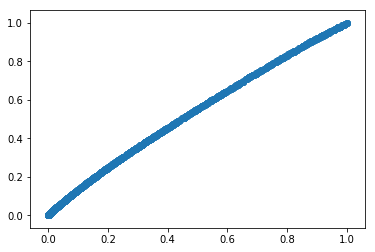

In [39]:
plt.scatter(pList,correctPList)
plt.show()

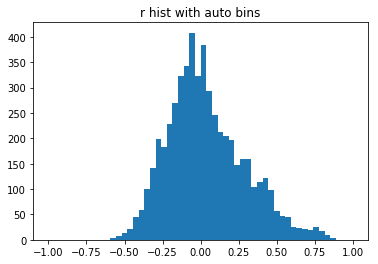

In [40]:
#create and show histogram of r values from 0 to 1
plt.hist(rList,bins='auto',range=(-1,1))
plt.title("r hist with auto bins")
plt.show()

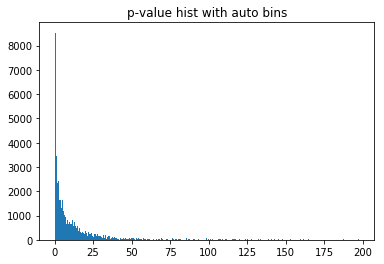

In [41]:
#create and show histogram of p values from 0 to 1
#binList = [0,0.01,0.02,0.03,0.04,0.05]#custom bin range.
plt.hist(logpList,bins='auto') #range=(0,1))
plt.title("p-value hist with auto bins")
plt.show()

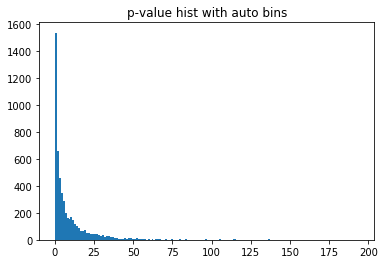

In [42]:
plt.hist([-math.log10(i) for i in correctPList],bins='auto') #range=(0,1))
plt.title("p-value hist with auto bins")
plt.show()